# Домашняя работа №2

In [2]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

Генеральная совокупность - это совокупность всех объектов о которых предполагается делать выводы. Выборка - это часть генеральной совокупности, которая охватывавется экспериментом. Т.о. все объекты ген. совокупности могут быть разбиты на подмножества разных размеров - выборки. При этом эти подмножества могут как пересекаться, так и нет, все зависит от целей экспериментатора и способов формирования выборки.
Выборка  также - это последовательность независимых, одинаково распределенных случайных величин.

- Если размер выборки больше 200, то такая выборка является репрезентативной?

Это зависит от размеров генеральной совокупности и решаемых задач. Например, выборка 200 людей из России, для целей анализа цвета волос, не даст нам никакого представления о всей популяции людей на планете. В тоже время выборка 200 пациентов для тестирования действия нового препарата - это более чем достаточно. Золотой стандарт - от 100 человек. Требование к обоснованию размера выборки, например, закреплено в [Good Clinical Practice](https://ru.wikipedia.org/wiki/GCP_(%D1%81%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D1%82))

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

1. Длина волос всех футболистов на ЧМ-2018
2. Длина волос всех футболистов во Франции
3. Длина волос футоблистов - обладателей кубка мира

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

1. Брать по 60 детей (30 мальчиков и 30 девочек) из каждого районного роддома каждый четный год.
2. Взять по 10 детей (5 мальчиков и 5 девочек) из 2 районных роддомов каждые пол года.

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


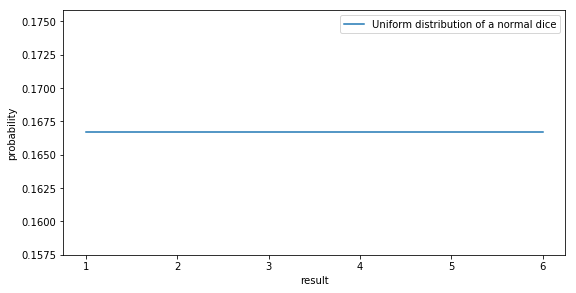

In [3]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(9, 4.5)

x = np.arange(1, 7, 1)
ax.plot(x, [1/6 for y in range(6)], label="Uniform distribution of a normal dice")


plt.xlabel('result')
plt.ylabel('probability')
plt.legend()
plt.show()

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [4]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
mean = sample.mean()

#your code here
overshoot = sample[-1] * 10
sample_with_overshoot = np.append(np.delete(sample, 50), overshoot)
new_med =sorted(sample_with_overshoot)[24]
new_mean =sample_with_overshoot.mean()
print('Median comparison: before = {}, after = {}'.format(round(med, 2), round(new_med, 2)))
print('Mean comparison: before = {}, after = {}'.format(round(mean, 2), round(new_mean, 2)))
print('Median is less sensitive for overshoots in the sample')

Median comparison: before = 3.49, after = 3.53
Mean comparison: before = 3.65, after = 4.25
Median is less sensitive for overshoots in the sample


- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [5]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = sample.mean()
mean_with_c = (sample+C).mean()
mean_mult_c = (sample*C).mean()
print('Mean = {}, Mean+C = {}, Mean*C = {}'.format(round(mean,2),round(mean_with_c,2),round(mean_mult_c,2)))

Mean = 2.09, Mean+C = 2.59, Mean*C = 1.04


- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [6]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = np.arange(sample.max() * 2, sample.max() * 3, 1)
sample_with_overshoot = np.append(sample, overshoot)
new_var = sample_with_overshoot.var()

print('Var before = {}, Var after = {}'.format(round(var, 4), round(new_var, 4)))
print('Var is drasticly sensitive for overshoots')

Var before = 1.0786, Var after = 44.2288
Var is drasticly sensitive for overshoots


- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [7]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)
#your code here
int_qnt_range = np.quantile(sample, 0.75) - np.quantile(sample, 0.25)
std_from_mean = sample.std() * 2
print('(X_0.75 - X_0.25) = {}, (X+s)-(X-s) = {}'.format(round(int_qnt_range, 2),round(std_from_mean, 2)))
print('+/- 1 std is larger')

(X_0.75 - X_0.25) = 1.31, (X+s)-(X-s) = 1.99
+/- 1 std is larger


## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

В общем смысле статистика - это любая функция от выборки, которая описывает эту выборку.Простыми словами, статистика - это то как мы можем описать нашу выборку используя меры центральной тенденции, такие как среднее, мода, медиана, а также меры изменчивости, такие как дисперсия, межквартильный размах и прочее.

In [8]:
beta_rv = stats.beta(1,3)
#your code here
sample = beta_rv.rvs(50)
beta_std = sample.std()
print('std for beta distribution sample = {}'.format(round(beta_std, 4)))


std for beta distribution sample = 0.1757


- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

Статистики для оценки на выборке:

#### Выборочное среднее
$$\bar{X} = \frac{1}{n}\sum_{i=1}^{n}X_{i}$$

#### Медиана
X - сортированный диапазон
$$m = \begin{cases}
X_{(n / 2)},\ n = 2k \\
\dfrac{X_{(n / 2)} + X_{(n / 2) + 1}}{2},\ n = 2k + 1 \\
\end{cases}$$

#### Выборочная дисперсия
$$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2 $$

In [110]:
gamma_rv = stats.gamma(2,2)

#your code here
sample = gamma_rv.rvs(1000)
# Ниже считаем статистики по выборке 1000 величин из гамма распределения
mean = sample.sum() / len(sample)
med = np.quantile(sample, 0.5)
var = ((sample-mean)**2).sum() / (len(sample) - 1)
print('Среднее: {}, Медиана: {}, Дисперсия: {}'.format(round(mean,2),round(med,2),round(var,2)))

Среднее: 4.02, Медиана: 3.7, Дисперсия: 2.01


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

Выборочные средние $\bar{X}$ должны быть распределены нормально вблизи среднего генеральной совокупности $M$. Дисперсией такого распределения называется стандартная ошибка среднего которая находится по формуле:

$$SE_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$$

Среднее значение средних значений = 4.98863
SE = 0.28284


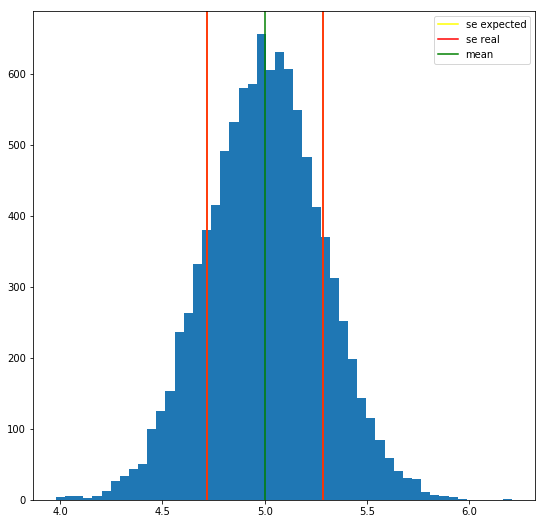

In [209]:
# your code here
norm_rv = stats.norm(5,2)
sample_x1 = []
for i in range(10000):
    sample = norm_rv.rvs(50)
    sample_x1.append(sample.mean())

# Считаем среднее значение средних значений
mean_1 = sum(sample_x1)/len(sample_x1)
print('Среднее значение средних значений = {}'.format(round(mean,5)))

# Считаем стандартную ошибку среднего
sample_x1 = np.array(sample_x1)
se_1 = 2/50**0.5
print('SE = {}'.format(round(se_1,5)))
plt.figure(figsize=(9,9))
plt.hist(sample_x1, bins=50)
plt.axvline(x=mean_1-se_1, c='yellow', label='se expected')
plt.axvline(x=mean_1+se_1, c='yellow')
plt.axvline(x=mean_1-sample_x1.std(), c='red', label='se real')
plt.axvline(x=mean_1+sample_x1.std(), c='red')
plt.axvline(x=mean_1, c='green', label='mean')
plt.legend()

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

Среднее значение средних значений = 5.02704
SE = 0.89443


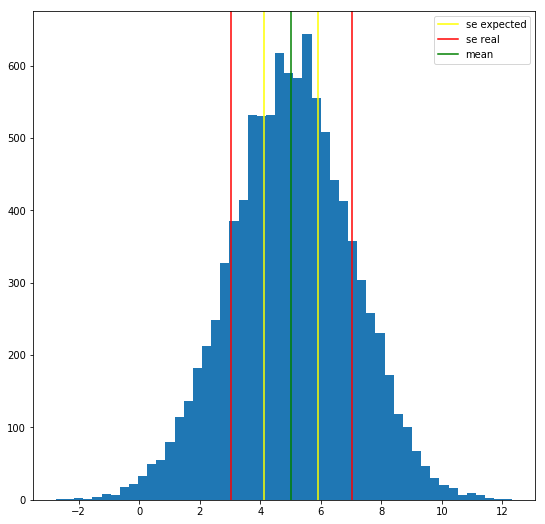

In [199]:
#your code here
norm_rv = stats.norm(5,2)
sample_x2 = []
for i in range(10000):
    sample = norm_rv.rvs(5)
    sample_x2.append(sample[0:1].mean())
# Считаем среднее значение средних значений
mean_2 = sum(sample_x2)/len(sample_x2)
print('Среднее значение средних значений = {}'.format(round(mean_2,5)))
# Считаем стандартную ошибку среднего
sample_x2 = np.array(sample_x2)
se_2 = 2/5**0.5
print('SE = {}'.format(round(se_2,5)))
plt.figure(figsize=(9,9))
plt.hist(sample_x2, bins=50)
plt.axvline(x=mean_2-se_2, c='yellow', label='se expected')
plt.axvline(x=mean_2+se_2, c='yellow')
plt.axvline(x=mean_2-sample_x2.std(), c='red', label='se real')
plt.axvline(x=mean_2+sample_x2.std(), c='red')
plt.axvline(x=mean_2, c='green', label='mean')
plt.legend()

- Сделайте z-преобразование для данного распределения и посчитайте новое матожидание и дисперсию 

In [260]:
expon_rv = stats.expon(3)
sample = expon_rv.rvs(10000)
new_sample = (sample - sample.mean())/sample.std()
print(round(new_sample.mean(),5))
print(round(new_sample.std(),5))
#Насколько я понял, можно бы было просто задать распределение stats.expon(1), так как при лямбда 1, дисперсия будет равна 1

0.0
1.0


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [261]:
#your code here
chi2_rv = stats.chi2(10)
chi2_rv.ppf(0.9)

15.987179172105263

- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [202]:
#95% - шире
t_rv = stats.t(15)
print('+/- {}'.format(round(t_rv.ppf(0.9),5)))
print('+/- {}'.format(round(t_rv.ppf(0.95),5)))

+/- 1.34061
+/- 1.75305


- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

Теоретически (по ЦПТ) они не должны сильно отличасться. Ниже строю боксплот, и в моем конкретном случае меньшая выборка показала меньший разброс. Шанс различий в меньшей выборке выше.

Sample_1: Q25 = -1.18473, Q75 = 1.2323
Sample_2: Q25 = -1.54206, Q75 = 1.37013


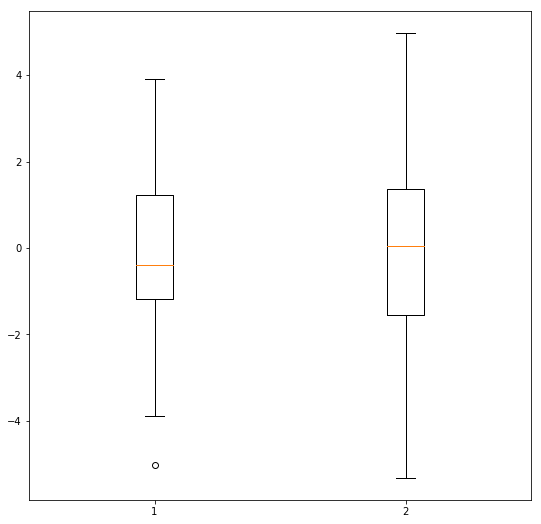

In [207]:
norm_rv = stats.norm(0, 2)
#your code here
sample_1 = norm_rv.rvs(50)
sample_2 = norm_rv.rvs(100)
plt.figure(figsize=(9,9))
plt.boxplot([sample_1, sample_2])
print('Sample_1: Q25 = {}, Q75 = {}'.format(round(np.quantile(sample_1, 0.25),5),round(np.quantile(sample_1, 0.75),5)))
print('Sample_2: Q25 = {}, Q75 = {}'.format(round(np.quantile(sample_2, 0.25),5),round(np.quantile(sample_2, 0.75),5)))

- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

Мы приняли ложную нулевую гипотезу и упустили открытие. Это ошибка второго рода. False negative error.

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем хуже гипотеза.


1. Нет. p лишь говорит о вероятности, что мы получим такие или еще более выраженные различия, при условии, что верна $H_0$
2. Нет. Исследую p мы лишь принимаем, либо отвергаем нулевую гипотезу. Мы ее не отвергаем, но это не означает, что она верна.
3. Нет. p-value не используется для сравнения качества гипотез.

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99% доверительный интервал хорошей оценкой в общем случае?

0.01 - т.к. "попасть" в него сложнее. Мы предъявляем более строгие требования для отклонения нулевой гипотезы. По-хорошему маленьгие p-value - стандартная практика в точных науках, например, в физике элементарных частиц. Здесь нет места случайности, все гипотезы должны быть непоколебимы, чтобы иметь шансы лечь в основу теории.

Что касается 99% доверительного интервала, то он шире чем 95%. Для более строгих выводов нужен меньший доверительный интервал.

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

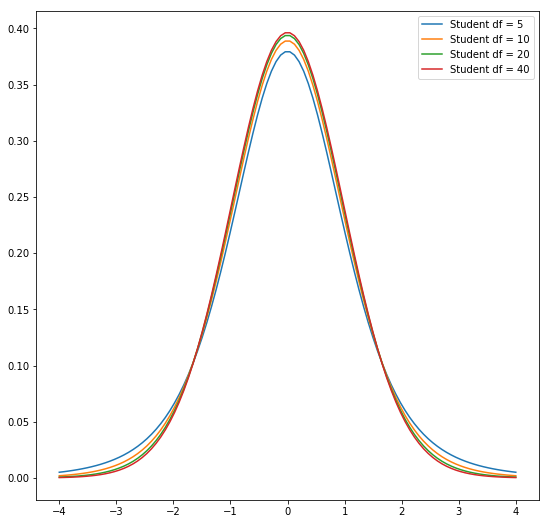

In [210]:
#your code here
t_rv_5 = stats.t(5)
t_rv_10 = stats.t(10)
t_rv_20 = stats.t(20)
t_rv_40 = stats.t(40)
x = np.linspace(-4, 4, 100)
plt.figure(figsize=(9,9))
pdf_5 = t_rv_5.pdf(x)
plt.plot(x, pdf_5, label='Student df = 5')
pdf_10 = t_rv_10.pdf(x)
plt.plot(x, pdf_10, label='Student df = 10')
pdf_20 = t_rv_20.pdf(x)
plt.plot(x, pdf_20, label='Student df = 20')
pdf_40 = t_rv_40.pdf(x)
plt.plot(x, pdf_40, label='Student df = 40')
plt.legend()
# Чем больше степеней свободы - тем ближе распределение Стьтюдента к нормальному. Распределение Стьюдента ниже в центре и выше на хвостах.

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

correlation_y1_y2 = -1.0


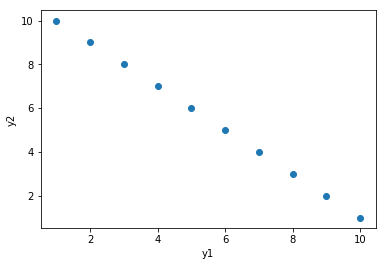

In [216]:
#your code here
x = np.arange(1,11,1)
y1 = np.arange(1,11,1)
y2 = np.arange(10,0,-1)
plt.xlabel('y1')
plt.ylabel('y2')
plt.scatter(y1,y2)

# Считаем коэффициент корреляции Пирсона вручную
cov_1 = ((y1 - y1.mean())*(y2 - y2.mean())).sum() / len(y1)
corr_1 = cov_1/(y1.std()*y2.std())
print('correlation_y1_y2 = {}'.format(corr_1))

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

correlation_y1_y2 = 0.0


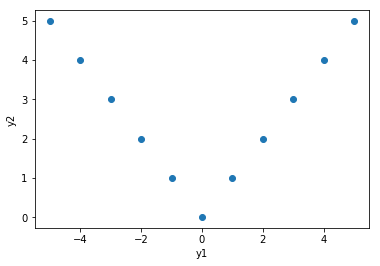

In [244]:
#your code here
x = np.arange(1,11,1)
y1 = np.arange(-5,6,1)
y2 = np.abs(y1)
plt.xlabel('y1')
plt.ylabel('y2')
plt.scatter(y1,y2)

# Считаем коэффициент корреляции Пирсона вручную
cov_2 = ((y1 - y1.mean())*(y2 - y2.mean())).sum() / len(y1)
corr_2 = cov_2/(y1.std()*y2.std())
print('correlation_y1_y2 = {}'.format(corr_2))

correlation_y1_y2 = 0.0


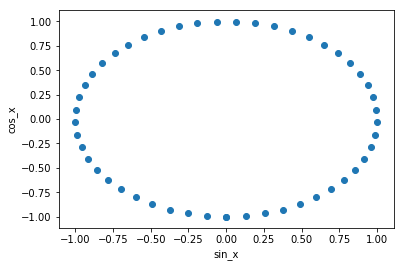

In [239]:
#your code here
x = np.linspace(-np.pi, np.pi, 50)
sin_x = np.sin(x)
cos_x = np.cos(x)

plt.xlabel('sin_x')
plt.ylabel('cos_x')
plt.scatter(sin_x, cos_x)

# Считаем коэффициент корреляции Пирсона вручную
cov_2 = ((sin_x - sin_x.mean())*(cos_x - cos_x.mean())).sum() / len(sin_x)
corr_2 = round(cov_2,10)/(sin_x.std()*cos_x.std())
print('correlation_y1_y2 = {}'.format(corr_2))

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [359]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))
#your code here
#Тут считаем общий ранг,
# точнее собираем словарь сортированных значений из двух выборок, где key - ранг, value - значение
sample_ranks = {}
i = 0
for val in sorted(sample):
    sample_ranks[i] = val
    i += 1
# Бежим по словарю выбирая значения из первой и второй выборок
s1_sum = 0
s2_sum = 0
for rank, value in sample_ranks.items():
    if value in sample_1:
        s1_sum += rank
    else:
        s2_sum += rank

print('Sample 1 sum of ranks: {}\nSample 2 sum of ranks: {}'.format(s1_sum, s2_sum))

Sample 1 sum of ranks: 9955
Sample 2 sum of ranks: 9945
